<a href="https://colab.research.google.com/github/kojiyam/information-transmission-engineering/blob/main/jd3_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 白色ガウス雑音


In [1]:
import numpy as np
np.random.seed(1) # 乱数のseedは固定

import matplotlib.pyplot as plt
# plt.style.use('dark_background') # for dark-mode
plt.rcParams["font.size"] = 16

import IPython.display
#from tqdm import tqdm # Progress bar

In [2]:
sampling_rate = 48e3 # (Hz) 音として出力するためのサンプリング周波数．変調とは関係なし
T_LENGTH = 10 # 音の時間長 (s)
t = np.arange( T_LENGTH * sampling_rate ) / sampling_rate # サンプリング時刻
t.size

480000

In [3]:
n = 0.01*np.random.randn(t.size) # 正規分布
# 0.01をかけているのは，音量調整

In [4]:
# nの絶対値が1を越えると，IPython.display.Audio に入力できないので，確認
print(sum(np.abs(n)>1))

0


(0.0, 1.0)

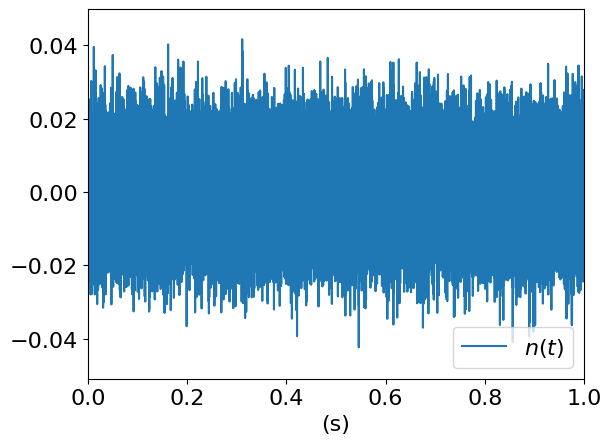

In [5]:
plt.plot(t, n, label='$n(t)$')
plt.xlabel('(s)')
plt.legend(loc='lower right')
plt.xlim(0,1)

In [6]:
# -1から1の間の数値である必要
IPython.display.Audio(n, rate = sampling_rate, normalize=False)

## 周波数軸上表示

In [7]:
N = np.fft.fft(n)
freq = np.fft.fftfreq(n.size, d=1/sampling_rate)

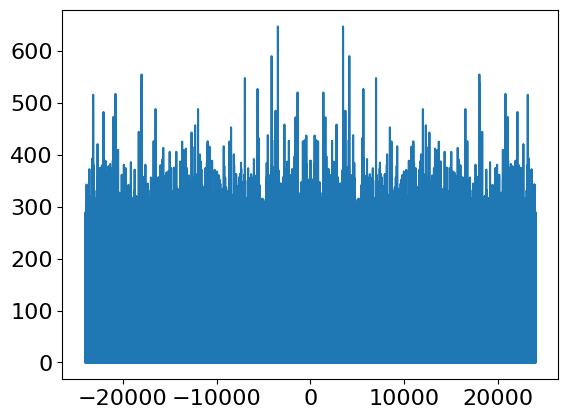

In [8]:
plt.plot(freq, N.real**2 + N.imag**2)

## 以下は書きかけ

In [9]:
n = np.random.rand(t.size)-0.5 # 一様分布
# グラフや音を再度実行

In [10]:
# 自己相関 元のままだと計算が終わらないので，一部
# https://stackoverflow.com/questions/643699/how-can-i-use-numpy-correlate-to-do-autocorrelation
n_part = n[0:100]
result = np.correlate(n_part, n_part, mode='full')
result.size

199

In [11]:
result = np.correlate(n[0:100], n[0:100], mode='full')


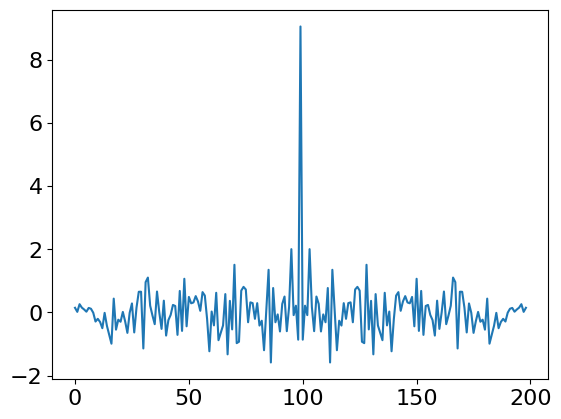

In [12]:
plt.plot(result)